In [241]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/av-genpact-hack-dec2018/test.csv
/kaggle/input/av-genpact-hack-dec2018/meal_info.csv
/kaggle/input/av-genpact-hack-dec2018/train.csv
/kaggle/input/av-genpact-hack-dec2018/fulfilment_center_info.csv


In [242]:
train = pd.read_csv('/kaggle/input/av-genpact-hack-dec2018/train.csv')
meal = pd.read_csv('/kaggle/input/av-genpact-hack-dec2018/meal_info.csv')
center = pd.read_csv('/kaggle/input/av-genpact-hack-dec2018/fulfilment_center_info.csv')

In [243]:
meal

meal_id      category      cuisine
0      1885     Beverages         Thai
1      1993     Beverages         Thai
2      2539     Beverages         Thai
3      1248     Beverages       Indian
4      2631     Beverages       Indian
5      1311        Extras         Thai
6      1062     Beverages      Italian
7      1778     Beverages      Italian
8      1803        Extras         Thai
9      1198        Extras         Thai
10     2707     Beverages      Italian
11     1847          Soup         Thai
12     1438          Soup         Thai
13     2494          Soup         Thai
14     2760  Other Snacks         Thai
15     2490         Salad      Italian
16     1109     Rice Bowl       Indian
17     2290     Rice Bowl       Indian
18     1525  Other Snacks         Thai
19     2704  Other Snacks         Thai
20     1878      Starters         Thai
21     2640      Starters         Thai
22     2577      Starters         Thai
23     1754      Sandwich      Italian
24     1971      Sandwich      Italian
25     2306         Pasta      Italian
26     2139     Beverages       Indian
27     2826      Sandwich      Italian
28     2664         Salad      Italian
29     2569         Salad      Italian
30     1230     Beverages  Continental
31     1207     Beverages  Continental
32     2322     Beverages  Continental
33     2492        Desert       Indian
34     1216         Pasta      Italian
35     1727     Rice Bowl       Indian
36     1902       Biryani       Indian
37     1247       Biryani       Indian
38     2304        Desert       Indian
39     1543        Desert       Indian
40     1770       Biryani       Indian
41     2126         Pasta      Italian
42     1558         Pizza  Continental
43     2581         Pizza  Continental
44     1962         Pizza  Continental
45     1571          Fish  Continental
46     2956          Fish  Continental
47     2104          Fish  Continental
48     2444       Seafood  Continental
49     2867       Seafood  Continental
50     1445       Seafood  Continental

In [244]:
train.head()

id  week  center_id  meal_id  checkout_price  base_price  \
0  1379560     1         55     1885          136.83      152.29   
1  1466964     1         55     1993          136.83      135.83   
2  1346989     1         55     2539          134.86      135.86   
3  1338232     1         55     2139          339.50      437.53   
4  1448490     1         55     2631          243.50      242.50   

   emailer_for_promotion  homepage_featured  num_orders  
0                      0                  0         177  
1                      0                  0         270  
2                      0                  0         189  
3                      0                  0          54  
4                      0                  0          40

In [245]:
data = train.merge(meal, on='meal_id')

In [246]:
data

id  week  center_id  meal_id  checkout_price  base_price  \
0       1379560     1         55     1885          136.83      152.29   
1       1040403     1         24     1885          136.83      136.83   
2       1103215     1         11     1885          136.83      136.83   
3       1034383     1         83     1885          121.31      120.31   
4       1118999     1         32     1885          114.52      113.52   
...         ...   ...        ...      ...             ...         ...   
456543  1458599   145         65     2104          582.03      582.03   
456544  1417199   145        110     2104          582.03      581.03   
456545  1434028   145         68     2104          582.03      581.03   
456546  1205895   145         51     2104          641.23      640.23   
456547  1443704   145         61     2104          581.03      582.03   

        emailer_for_promotion  homepage_featured  num_orders   category  \
0                           0                  0         177  Beverages   
1                           0                  0        1498  Beverages   
2                           0                  0         959  Beverages   
3                           0                  1        1025  Beverages   
4                           0                  1         445  Beverages   
...                       ...                ...         ...        ...   
456543                      0                  0         134       Fish   
456544                      0                  0          28       Fish   
456545                      0                  0          40       Fish   
456546                      0                  0          69       Fish   
456547                      0                  0          27       Fish   

            cuisine  
0              Thai  
1              Thai  
2              Thai  
3              Thai  
4              Thai  
...             ...  
456543  Continental  
456544  Continental  
456545  Continental  
456546  Continental  
456547  Continental  

[456548 rows x 11 columns]

In [247]:
data = data.merge(center, on='center_id')

In [248]:
train_data = data

In [249]:
df=data.copy()

In [250]:
data.nunique()

id                       456548
week                        145
center_id                    77
meal_id                      51
checkout_price             1992
base_price                 1907
emailer_for_promotion         2
homepage_featured             2
num_orders                 1250
category                     14
cuisine                       4
city_code                    51
region_code                   8
center_type                   3
op_area                      30
dtype: int64

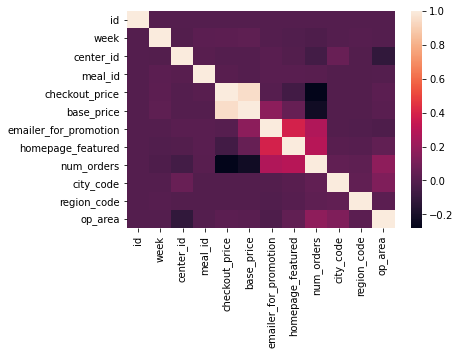

In [251]:
corr = data.corr()
import seaborn as sns
sns.heatmap(corr)

In [252]:
ts_tot_orders = data.groupby(['week'])['num_orders'].sum()
ts_tot_orders = pd.DataFrame(ts_tot_orders)
ts_tot_orders

num_orders
week            
1         792261
2         787084
3         695262
4         743529
5        1198675
...          ...
141       776240
142       739661
143       759926
144       801197
145       671926

[145 rows x 1 columns]

In [253]:
import plotly.graph_objs as go
import plotly.offline as pyoff
plot_data = [
    go.Scatter(
        x=ts_tot_orders.index,
        y=ts_tot_orders['num_orders'],
        name='Time Series for num_orders',
        marker = dict(color = 'Blue')
        #x_axis="OTI",
        #y_axis="time",http://localhost:8888/notebooks/Kaggle_for_timepass/hackathon/Sigma-thon-master/Sigma-thon-master/eda1.ipynb#
    )
]
plot_layout = go.Layout(
        title='Total orders per week',
        yaxis_title='Total orders',
        xaxis_title='Week',
        plot_bgcolor='rgba(0,0,0,0)'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

In [254]:
center_id = data.groupby(['center_id'])['num_orders'].sum()
center_id = pd.DataFrame(center_id)

In [255]:
center_id=center_id.reset_index()

In [256]:
import plotly.express as px
fig = px.bar(center_id, x="center_id", y="num_orders", color='center_id')
fig.update_layout({
'plot_bgcolor': 'rgba(1, 1, 1, 1)',
'paper_bgcolor': 'rgba(1, 1, 1, 1)',
})

fig.show()

In [257]:
meal_id = df.groupby(['category', 'cuisine'])['num_orders'].sum()
meal_id = pd.DataFrame(meal_id)

In [258]:
meal_id=meal_id.reset_index()

In [259]:
meal_id

category      cuisine  num_orders
0      Beverages  Continental     5943046
1      Beverages       Indian     2345879
2      Beverages      Italian    13953970
3      Beverages         Thai    18237630
4        Biryani       Indian      631848
5         Desert       Indian     1940754
6         Extras         Thai     3984979
7           Fish  Continental      871959
8   Other Snacks         Thai     4766293
9          Pasta      Italian     1637744
10         Pizza  Continental     7383720
11     Rice Bowl       Indian    20874063
12         Salad      Italian    10944336
13      Sandwich      Italian    17636782
14       Seafood  Continental     2715714
15          Soup         Thai     1039646
16      Starters         Thai     4649122

In [260]:
meal_id['meal'] = meal_id.apply(lambda x : x['category']+', '+x['cuisine'],axis=1)

In [261]:
meal_id

category      cuisine  num_orders                    meal
0      Beverages  Continental     5943046  Beverages, Continental
1      Beverages       Indian     2345879       Beverages, Indian
2      Beverages      Italian    13953970      Beverages, Italian
3      Beverages         Thai    18237630         Beverages, Thai
4        Biryani       Indian      631848         Biryani, Indian
5         Desert       Indian     1940754          Desert, Indian
6         Extras         Thai     3984979            Extras, Thai
7           Fish  Continental      871959       Fish, Continental
8   Other Snacks         Thai     4766293      Other Snacks, Thai
9          Pasta      Italian     1637744          Pasta, Italian
10         Pizza  Continental     7383720      Pizza, Continental
11     Rice Bowl       Indian    20874063       Rice Bowl, Indian
12         Salad      Italian    10944336          Salad, Italian
13      Sandwich      Italian    17636782       Sandwich, Italian
14       Seafood  Continental     2715714    Seafood, Continental
15          Soup         Thai     1039646              Soup, Thai
16      Starters         Thai     4649122          Starters, Thai

In [262]:
import plotly.express as px
fig = px.bar(meal_id, x="meal", y="num_orders", color='meal')
fig.update_layout({
'plot_bgcolor': 'rgba(1, 1, 1, 1)',
'paper_bgcolor': 'rgba(1, 1, 1, 1)',
})

fig.show()

In [263]:
cat_var = ['center_type',
 'category',
 'cuisine']

In [264]:
import plotly.graph_objs as go
import plotly.offline as pyoff
for i in cat_var:
    grp=df.groupby([i])
    grp=pd.DataFrame(grp)
    lis=grp[0]
    x=0
    plot_data=[]
    for j in lis:
        print(i)
        print(j)
        data = df[df[i]==j]
        data = pd.DataFrame(data)
        tot_orders = data.groupby(['week'])['num_orders'].sum()
        tot_orders = pd.DataFrame(tot_orders)
       
        plot_data.append(go.Scatter(
                x=tot_orders.index,
                y=tot_orders['num_orders'],
                name=str(j),
                #marker = dict(color = colors[x%12])
                #x_axis="OTI",
                #y_axis="time",
            ))
        
        x+=1
    plot_layout = go.Layout(
            title='Total orders per week for '+str(i),
            yaxis_title='Total orders',
            xaxis_title='Week',
            plot_bgcolor='rgba(0,0,0,0)'
        )
    fig = go.Figure(data=plot_data, layout=plot_layout)
    pyoff.iplot(fig)

center_type
TYPE_A
center_type
TYPE_B
center_type
TYPE_C


category
Beverages
category
Biryani
category
Desert
category
Extras
category
Fish
category
Other Snacks
category
Pasta
category
Pizza
category
Rice Bowl
category
Salad
category
Sandwich
category
Seafood
category
Soup
category
Starters


cuisine
Continental
cuisine
Indian
cuisine
Italian
cuisine
Thai


In [265]:
center_type = df.groupby(['center_type'])['num_orders'].sum()
center_type = pd.DataFrame(center_type)

In [266]:
center_type

num_orders
center_type            
TYPE_A         68978517
TYPE_B         29996073
TYPE_C         20582895

In [267]:
center_type=center_type.reset_index()

In [268]:
import plotly.express as px
fig = px.bar(center_type, x="center_type", y="num_orders", color='center_type')
fig.update_layout({
'plot_bgcolor': 'rgba(1, 1, 1, 1)',
'paper_bgcolor': 'rgba(1, 1, 1, 1)',
})

fig.show()

In [269]:
category = df.groupby(['category'])['num_orders'].sum()
category = pd.DataFrame(category)

In [270]:
category = category.reset_index()

In [271]:
import plotly.express as px
fig = px.bar(category, x="category", y="num_orders", color='category')
fig.update_layout({
'plot_bgcolor': 'rgba(1, 1, 1, 1)',
'paper_bgcolor': 'rgba(1, 1, 1, 1)',
})
fig.show()

In [272]:
cuisine = df.groupby(['cuisine'])['num_orders'].sum()
cuisine = pd.DataFrame(cuisine)

In [273]:
cuisine = cuisine.reset_index()

In [274]:
import plotly.express as px
fig = px.bar(cuisine, x="cuisine", y="num_orders", color='cuisine')
fig.update_layout({
'plot_bgcolor': 'rgba(1, 1, 1, 1)',
'paper_bgcolor': 'rgba(1, 1, 1, 1)',
})
fig.show()

In [275]:
cat_ct=df.groupby(['category', 'center_type'])['num_orders'].sum()

In [276]:
cat_ct = cat_ct.unstack().fillna(0)
cat_ct

center_type     TYPE_A   TYPE_B   TYPE_C
category                                
Beverages     24633857  9340360  6506308
Biryani         348112   228273    55463
Desert         1006575   597142   337037
Extras         2385158  1251120   348701
Fish            468892   375444    27623
Other Snacks   2721316  1755359   289618
Pasta           893619   530987   213138
Pizza          4178759  1585932  1619029
Rice Bowl     11847850  5519104  3507109
Salad          5773622  2269206  2901508
Sandwich       9844003  3760525  4032254
Seafood        1624714   790897   300103
Soup            612597   296544   130505
Starters       2639443  1695180   314499

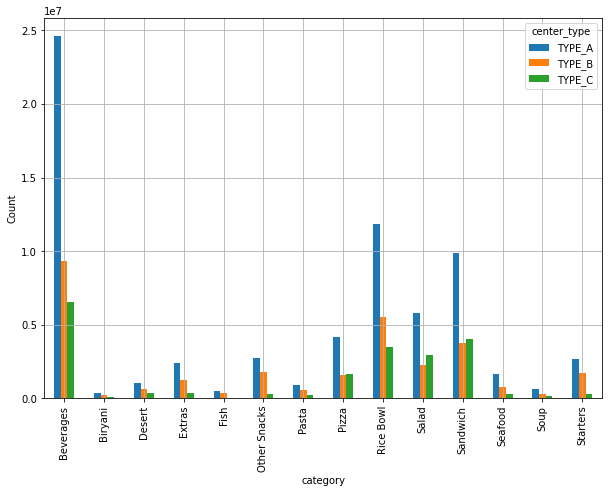

In [277]:
# Visualize this data in bar plot
import matplotlib.pyplot as plt
ax = (cat_ct).plot(
kind='bar',
figsize=(10, 7),
grid=True
)
ax.set_ylabel('Count')
plt.show()

In [278]:
cat_cu=df.groupby(['category', 'cuisine'])['num_orders'].sum()
cat_cu = cat_cu.unstack().fillna(0)
cat_cu

cuisine       Continental      Indian     Italian        Thai
category                                                     
Beverages       5943046.0   2345879.0  13953970.0  18237630.0
Biryani               0.0    631848.0         0.0         0.0
Desert                0.0   1940754.0         0.0         0.0
Extras                0.0         0.0         0.0   3984979.0
Fish             871959.0         0.0         0.0         0.0
Other Snacks          0.0         0.0         0.0   4766293.0
Pasta                 0.0         0.0   1637744.0         0.0
Pizza           7383720.0         0.0         0.0         0.0
Rice Bowl             0.0  20874063.0         0.0         0.0
Salad                 0.0         0.0  10944336.0         0.0
Sandwich              0.0         0.0  17636782.0         0.0
Seafood         2715714.0         0.0         0.0         0.0
Soup                  0.0         0.0         0.0   1039646.0
Starters              0.0         0.0         0.0   4649122.0

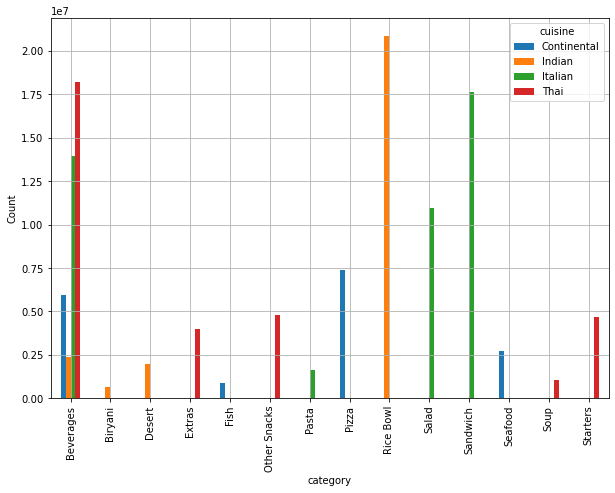

In [279]:
# Visualize this data in bar plot
ax = (cat_cu).plot(
kind='bar',
figsize=(10, 7),
grid=True
)
ax.set_ylabel('Count')
plt.show()

In [280]:
ct_cu=df.groupby(['center_type', 'cuisine'])['num_orders'].sum()
ct_cu = ct_cu.unstack().fillna(0)
ct_cu

cuisine      Continental    Indian   Italian      Thai
center_type                                           
TYPE_A           9874117  14512558  24778761  19813081
TYPE_B           3559456   6944518   9939385   9552714
TYPE_C           3480866   4335468   9454686   3311875

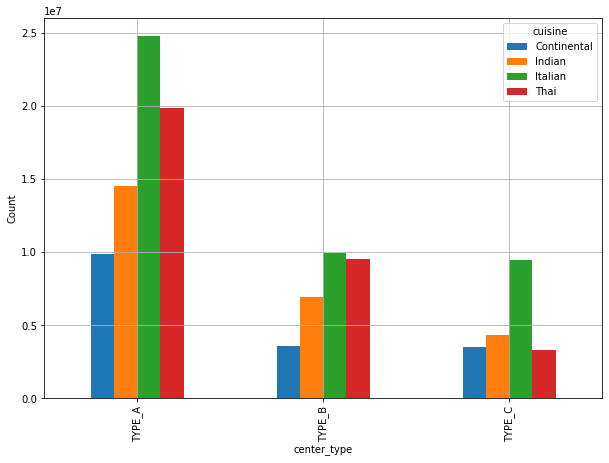

In [281]:
# Visualize this data in bar plot
ax = (ct_cu).plot(
kind='bar',
figsize=(10, 7),
grid=True
)
ax.set_ylabel('Count')
plt.show()

# User_input

# Please put center id and meal id

In [282]:
center_id = 55
meal_id = 1993

# here we are putting user input
# here the prediction related to that center id and that particular meal id.

In [283]:
train_df = train_data[train_data['center_id']==center_id]
train_df = train_df[train_df['meal_id']==meal_id]

In [284]:
period = len(train_df)

In [285]:
train_df['Date'] = pd.date_range('2015-01-01', periods=period, freq='W')

In [286]:
train_df['Day'] = train_df['Date'].dt.day
train_df['Month'] = train_df['Date'].dt.month
train_df['Year'] = train_df['Date'].dt.year
train_df['Quarter'] = train_df['Date'].dt.quarter

In [287]:
train_df.head()

id  week  center_id  meal_id  checkout_price  base_price  \
145  1466964     1         55     1993          136.83      135.83   
146  1035555     2         55     1993          133.89      133.89   
147  1282652     3         55     1993          134.86      133.86   
148  1066744     4         55     1993          134.89      133.89   
149  1115779     5         55     1993          147.50      145.50   

     emailer_for_promotion  homepage_featured  num_orders   category cuisine  \
145                      0                  0         270  Beverages    Thai   
146                      0                  0         121  Beverages    Thai   
147                      0                  0         258  Beverages    Thai   
148                      0                  0          82  Beverages    Thai   
149                      0                  0          81  Beverages    Thai   

     city_code  region_code center_type  op_area       Date  Day  Month  Year  \
145        647           56      TYPE_C      2.0 2015-01-04    4      1  2015   
146        647           56      TYPE_C      2.0 2015-01-11   11      1  2015   
147        647           56      TYPE_C      2.0 2015-01-18   18      1  2015   
148        647           56      TYPE_C      2.0 2015-01-25   25      1  2015   
149        647           56      TYPE_C      2.0 2015-02-01    1      2  2015   

     Quarter  
145        1  
146        1  
147        1  
148        1  
149        1

In [288]:
colors=['#b84949', '#ff6f00', '#ffbb00', '#9dff00', '#329906', '#439c55', '#67c79e', '#00a1db', '#002254', '#5313c2', '#c40fdb', '#e354aa']

In [289]:
import plotly.graph_objs as go
import plotly.offline as pyoff
for i in cat_var:
    grp=train_df.groupby([i])
    grp=pd.DataFrame(grp)
    lis=grp[0]
    x=0
    for j in lis:
        print(i)
        print(j)
        data = train_df[train_df[i]==j]
        data = pd.DataFrame(data)
        tot_orders = data.groupby(['week'])['num_orders'].sum()
        tot_orders = pd.DataFrame(tot_orders)
        plot_data = [
            go.Scatter(
                x=tot_orders.index,
                y=tot_orders['num_orders'],
                name='Time Series for num_orders for '+str(j),
                marker = dict(color = colors[x%12])
                #x_axis="OTI",
                #y_axis="time",
            )
        ]
        plot_layout = go.Layout(
                title='Total orders per week for '+str(j),
                yaxis_title='Total orders',
                xaxis_title='Week',
                plot_bgcolor='rgba(0,0,0,0)'
            )
        fig = go.Figure(data=plot_data, layout=plot_layout)
        x+=1
        pyoff.iplot(fig)

center_type
TYPE_C


category
Beverages


cuisine
Thai


# XGB Boost

In [290]:
xb_data = train_df.drop(columns=['id','center_id','meal_id','category','cuisine','center_type'])

xb_data = xb_data.set_index(['Date'])

In [291]:
x_train = xb_data.drop(columns='num_orders')
y_train = xb_data['num_orders']
y_train = np.log1p(y_train)
split_size = period-15
X_train = x_train.iloc[:split_size,:]
X_test = x_train.iloc[split_size:,:]
Y_train =  y_train.iloc[:split_size]
Y_test = y_train.iloc[split_size:]

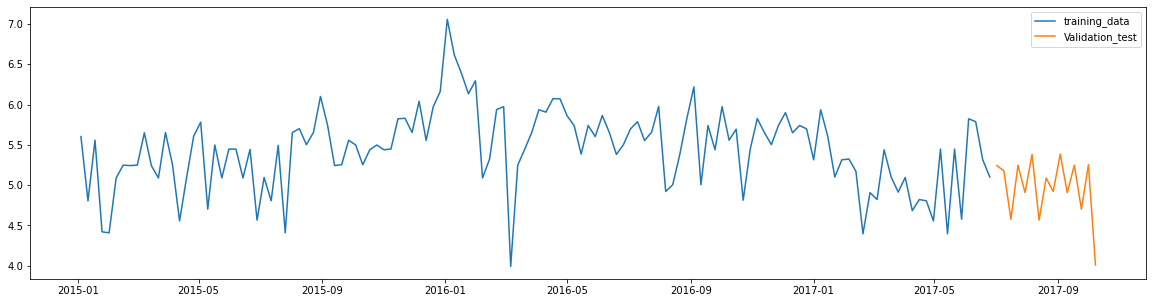

In [292]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
plt.plot(Y_train, label='training_data')
plt.plot(Y_test, label='Validation_test')
plt.legend(loc='best')

In [293]:
from xgboost import XGBRegressor
model_2 = XGBRegressor(
 learning_rate = 0.01,
 eval_metric ='rmse',
    n_estimators = 50000,
    max_depth = 5,
    subsample = 0.8,
    colsample_bytree = 1,
    gamma = 0.5
  
  
 )
#model.fit(X_train, y_train)
model_2.fit(X_train, Y_train, eval_metric='rmse', 
          eval_set=[(X_test, Y_test)], early_stopping_rounds=500, verbose=100)

[0]	validation_0-rmse:4.43914
Will train until validation_0-rmse hasn't improved in 500 rounds.
[100]	validation_0-rmse:1.44421
[200]	validation_0-rmse:0.55065
[300]	validation_0-rmse:0.34301
[400]	validation_0-rmse:0.35454
[500]	validation_0-rmse:0.38238
[600]	validation_0-rmse:0.39527
[700]	validation_0-rmse:0.40111
[800]	validation_0-rmse:0.40481
Stopping. Best iteration:
[314]	validation_0-rmse:0.33825



XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, eval_metric='rmse',
             gamma=0.5, gpu_id=-1, importance_type='gain',
             interaction_constraints='', learning_rate=0.01, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=50000, n_jobs=0,
             num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, subsample=0.8, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [294]:
a = (model_2.get_booster().best_iteration)
a

314

In [295]:
xgb_model = XGBRegressor(
     
     learning_rate = 0.01,
   
    n_estimators = a,
    max_depth = 5,
    subsample = 0.8,
    colsample_bytree = 1,
    gamma = 0.5)

In [296]:
xgb_model.fit(X_train, Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0.5, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.01, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=314, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.8,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [297]:
xgb_preds = xgb_model.predict(X_test)

In [298]:
xgb_preds = np.exp(xgb_preds)

In [299]:
train_df.tail()

id  week  center_id  meal_id  checkout_price  base_price  \
285  1210404   141         55     1993          149.41      148.41   
286  1162047   142         55     1993          152.35      152.35   
287  1006104   143         55     1993          151.35      150.35   
288  1107848   144         55     1993          151.35      150.35   
289  1401715   145         55     1993          159.14      158.14   

     emailer_for_promotion  homepage_featured  num_orders   category cuisine  \
285                      0                  0         134  Beverages    Thai   
286                      0                  0         189  Beverages    Thai   
287                      0                  0         109  Beverages    Thai   
288                      0                  0         190  Beverages    Thai   
289                      0                  0          54  Beverages    Thai   

     city_code  region_code center_type  op_area       Date  Day  Month  Year  \
285        647           56      TYPE_C      2.0 2017-09-10   10      9  2017   
286        647           56      TYPE_C      2.0 2017-09-17   17      9  2017   
287        647           56      TYPE_C      2.0 2017-09-24   24      9  2017   
288        647           56      TYPE_C      2.0 2017-10-01    1     10  2017   
289        647           56      TYPE_C      2.0 2017-10-08    8     10  2017   

     Quarter  
285        3  
286        3  
287        3  
288        4  
289        4

In [300]:
xgb_preds = pd.DataFrame(xgb_preds)
xgb_preds.index = Y_test.index

In [301]:
Y_train = np.exp(Y_train)
Y_test = np.exp(Y_test)

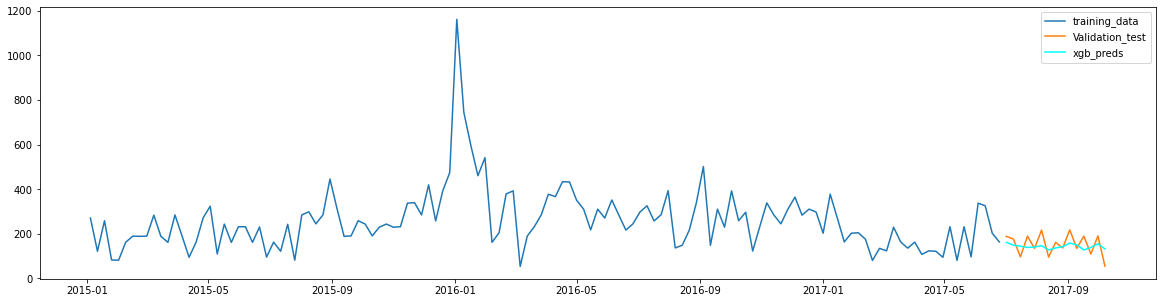

In [302]:
plt.figure(figsize=(20,5))
plt.plot(Y_train, label='training_data')
plt.plot(Y_test, label='Validation_test')
plt.plot(xgb_preds, color='cyan', label='xgb_preds')
plt.legend(loc='best')

# Light GBM Model

In [303]:
from lightgbm import LGBMRegressor
lgb_fit_params={"early_stopping_rounds":500, 
            "eval_metric" : 'rmse', 
            "eval_set" : [(X_test,Y_test)],
            'eval_names': ['valid'],
            'verbose':100
           }

lgb_params = {'boosting_type': 'gbdt',
 'objective': 'regression',
 'metric': 'rmse',
 'verbose': 0,
 'bagging_fraction': 0.8,
 'bagging_freq': 1,
 'lambda_l1': 0.01,
 'lambda_l2': 0.01,
 'learning_rate': 0.001,
 'max_bin': 255,
 'max_depth': 6,
 'min_data_in_bin': 1,
 'min_data_in_leaf': 1,
 'num_leaves': 31}

Y_train = np.log1p(Y_train)
Y_test = np.log1p(Y_test)

In [304]:
clf_lgb = LGBMRegressor(n_estimators=10000, **lgb_params, random_state=123456789, n_jobs=-1)
clf_lgb.fit(X_train, Y_train, **lgb_fit_params)

Training until validation scores don't improve for 500 rounds
[100]	valid's rmse: 155.134
[200]	valid's rmse: 155.141
[300]	valid's rmse: 155.149
[400]	valid's rmse: 155.156
[500]	valid's rmse: 155.164
Early stopping, best iteration is:
[3]	valid's rmse: 155.128


LGBMRegressor(bagging_fraction=0.8, bagging_freq=1, lambda_l1=0.01,
              lambda_l2=0.01, learning_rate=0.001, max_bin=255, max_depth=6,
              metric='rmse', min_data_in_bin=1, min_data_in_leaf=1,
              n_estimators=10000, objective='regression',
              random_state=123456789, verbose=0)

In [305]:
lgb_model = LGBMRegressor(bagging_fraction=0.8, bagging_freq=1, lambda_l1=0.01,
              lambda_l2=0.01, learning_rate=0.01, max_bin=255, max_depth=6,
              metric='rmse', min_data_in_bin=1, min_data_in_leaf=1,
              n_estimators=10000, objective='regression',
              random_state=123456789, verbose=0)

In [306]:
lgb_model.fit(X_train,Y_train)


LGBMRegressor(bagging_fraction=0.8, bagging_freq=1, lambda_l1=0.01,
              lambda_l2=0.01, learning_rate=0.01, max_bin=255, max_depth=6,
              metric='rmse', min_data_in_bin=1, min_data_in_leaf=1,
              n_estimators=10000, objective='regression',
              random_state=123456789, verbose=0)

In [307]:
lgm_preds = lgb_model.predict(X_test)
lgm_preds = np.exp(lgm_preds)

In [308]:
lgm_preds = pd.DataFrame(lgm_preds)
lgm_preds.index = Y_test.index

In [309]:
Y_train = np.exp(Y_train)
Y_test = np.exp(Y_test)

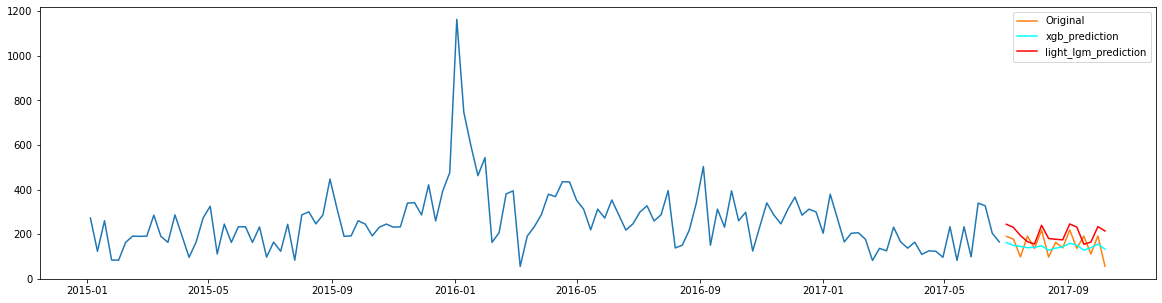

In [310]:
plt.figure(figsize=(20,5))
plt.plot(Y_train)
plt.plot(Y_test, label='Original')
plt.plot(xgb_preds, color='cyan', label="xgb_prediction")
plt.plot(lgm_preds, color='red', label='light_lgm_prediction')
plt.legend(loc='best')

# Cat_Regressor

In [338]:
from catboost import CatBoostRegressor
Y_train = np.log1p(Y_train)
Y_test = np.log1p(Y_test)

cat_model=CatBoostRegressor()
cat_model.fit(X_train, Y_train)

In [312]:
cat_preds = cat_model.predict(X_test)
cat_preds = np.exp(cat_preds)

In [313]:
cat_preds = pd.DataFrame(cat_preds)
cat_preds.index = Y_test.index
Y_train = np.exp(Y_train)
Y_test = np.exp(Y_test)

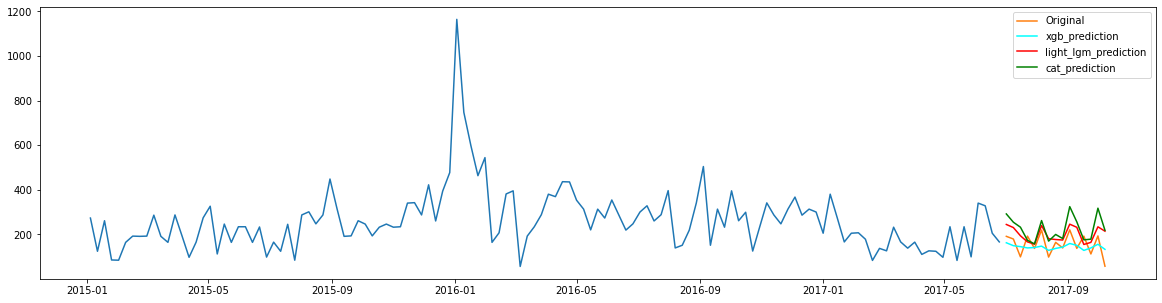

In [314]:
plt.figure(figsize=(20,5))
plt.plot(Y_train)
plt.plot(Y_test, label='Original')
plt.plot(xgb_preds, color='cyan', label="xgb_prediction")
plt.plot(lgm_preds, color='red', label='light_lgm_prediction')
plt.plot(cat_preds, color='green', label='cat_prediction')
plt.legend(loc='best')

# Prophet model

In [315]:
prophet_data = train_df[['Date','num_orders']]
prophet_data.index = xb_data.index
prophet_data = prophet_data.iloc[:split_size,:]

In [316]:
prophet_data =prophet_data.rename(columns={'Date':'ds',
                             'num_orders':'y'})
prophet_data.head()

ds    y
Date                      
2015-01-04 2015-01-04  270
2015-01-11 2015-01-11  121
2015-01-18 2015-01-18  258
2015-01-25 2015-01-25   82
2015-02-01 2015-02-01   81

In [317]:
from fbprophet import Prophet
m = Prophet(growth='linear',
            seasonality_mode='multiplicative',
#            changepoint_prior_scale = 30,
           seasonality_prior_scale = 35,
           holidays_prior_scale = 10,
           daily_seasonality = True,
           weekly_seasonality = False,
           yearly_seasonality= False,
           ).add_seasonality(
                name='monthly',
                period=30.5,
                fourier_order=30
            
            ).add_seasonality(
                name='weekly',
                period=7,
                fourier_order=55
            ).add_seasonality(
                name='yearly',
                period=365.25,
                fourier_order=20
            )
        
m.fit(prophet_data)

In [318]:
future = m.make_future_dataframe(periods=15, freq='W')

In [319]:
forecast = m.predict(future)
# forecast['yhat'] = np.exp(forecast['yhat'])
# forecast['yhat_lower'] = np.exp(forecast['yhat_lower'])
# forecast['yhat_upper'] = np.exp(forecast['yhat_upper'])
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds        yhat  yhat_lower  yhat_upper
140 2017-09-10  172.752777  122.573779  229.537530
141 2017-09-17  124.893513   71.280842  176.879365
142 2017-09-24  214.171454  157.095360  267.353869
143 2017-10-01  193.042356  140.194764  247.120039
144 2017-10-08   39.316611  -12.429690   91.368480

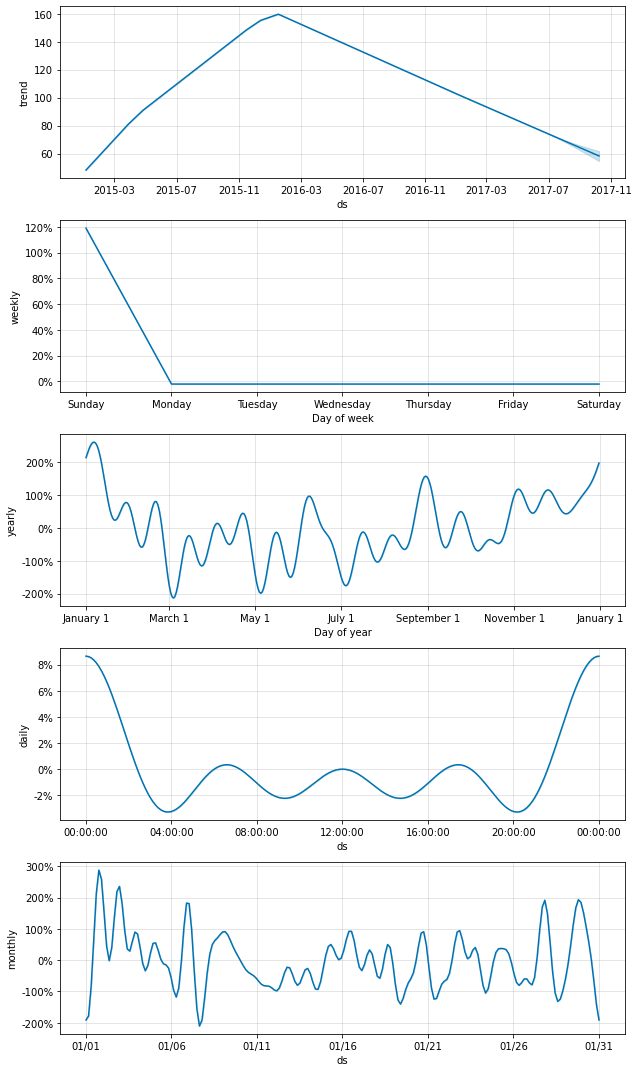

In [320]:
fig2 = m.plot_components(forecast)


In [321]:
from fbprophet.plot import plot_plotly
import plotly.offline as py
py.init_notebook_mode()

fig = plot_plotly(m, forecast)  # This returns a plotly Figure
py.iplot(fig)

In [322]:
prophet_preds = forecast['yhat'].iloc[split_size:]
prophet_preds.index = Y_test.index

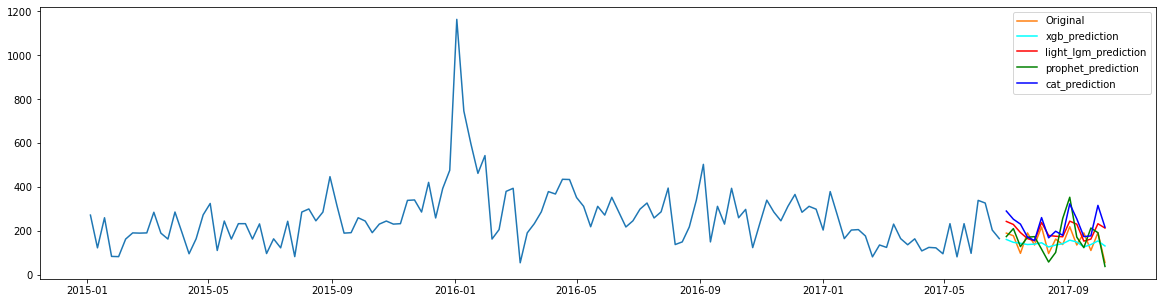

In [323]:
plt.figure(figsize=(20,5))
plt.plot(Y_train)
plt.plot(Y_test, label='Original')
plt.plot(xgb_preds, color='cyan', label="xgb_prediction")
plt.plot(lgm_preds, color='red', label='light_lgm_prediction')
plt.plot(prophet_preds, color='green', label='prophet_prediction')
plt.plot(cat_preds, color='blue', label='cat_prediction')
plt.legend(loc='best')

In [324]:
Y_train1=pd.DataFrame(Y_train)
Y_train1

num_orders
Date                  
2015-01-04       273.0
2015-01-11       124.0
2015-01-18       261.0
2015-01-25        85.0
2015-02-01        84.0
...                ...
2017-05-28        99.0
2017-06-04       340.0
2017-06-11       328.0
2017-06-18       205.0
2017-06-25       166.0

[130 rows x 1 columns]

In [325]:
original=pd.DataFrame(Y_test)
xgb_preds1=pd.DataFrame(xgb_preds)
lgm_preds1=pd.DataFrame(lgm_preds)
prophet_preds1=pd.DataFrame(prophet_preds)
cat_preds1=pd.DataFrame(cat_preds)

In [326]:
cat_preds1

0
Date                  
2017-07-02  291.438993
2017-07-09  254.303062
2017-07-16  232.030106
2017-07-23  172.994514
2017-07-30  157.241081
2017-08-06  261.726967
2017-08-13  169.647221
2017-08-20  199.508876
2017-08-27  181.053081
2017-09-03  324.189160
2017-09-10  256.065260
2017-09-17  175.217000
2017-09-24  178.331865
2017-10-01  317.255624
2017-10-08  218.229775

In [327]:
import plotly.graph_objs as go
import plotly.offline as pyoff
plot_data = [
    go.Scatter(
        x=Y_train1.index,
        y=Y_train1['num_orders'],
        name='Time Series for num_orders',
        #marker = dict(color = 'Blue')
        #x_axis="OTI",
        #y_axis="time",
    ),
    go.Scatter(
        x=original.index,
        y=original['num_orders'],
        name='Original',
        #marker = dict(color = 'Blue')
        #x_axis="OTI",
        #y_axis="time",
    ),
    go.Scatter(
        x=xgb_preds1.index,
        y=xgb_preds1[0],
        name='xgb_prediction',
        #marker = dict(color = 'Blue')
        #x_axis="OTI",
        #y_axis="time",
    ),
    go.Scatter(
        x=lgm_preds1.index,
        y=lgm_preds1[0],
        name='light_lgm_prediction',
        #marker = dict(color = 'Blue')
        #x_axis="OTI",
        #y_axis="time",
    ),
    go.Scatter(
        x=prophet_preds1.index,
        y=prophet_preds1['yhat'],
        name='prophet_prediction',
        #marker = dict(color = 'Blue')
        #x_axis="OTI",
        #y_axis="time",
    ),
    go.Scatter(
        x=cat_preds1.index,
        y=cat_preds1[0],
        name='cat_prediction',
        #marker = dict(color = 'Blue')
        #x_axis="OTI",
        #y_axis="time",
    )
    
    
]
plot_layout = go.Layout(
        title='Total orders per week',
        yaxis_title='Total orders',
        xaxis_title='Week',
        plot_bgcolor='rgba(0,0,0,0)'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

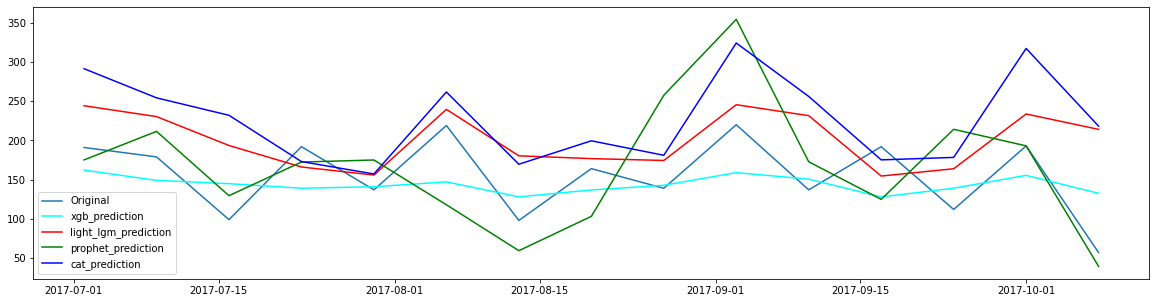

In [328]:
plt.figure(figsize=(20,5))
# plt.plot(Y_train)
plt.plot(Y_test, label='Original')
plt.plot(xgb_preds, color='cyan', label="xgb_prediction")
plt.plot(lgm_preds, color='red', label='light_lgm_prediction')
plt.plot(prophet_preds, color='green', label='prophet_prediction')
plt.plot(cat_preds, color='blue', label='cat_prediction')
plt.legend(loc='best')

In [329]:
import plotly.graph_objs as go
import plotly.offline as pyoff
plot_data = [
    go.Scatter(
        x=original.index,
        y=original['num_orders'],
        name='Original',
        #marker = dict(color = 'Blue')
        #x_axis="OTI",
        #y_axis="time",
    ),
    go.Scatter(
        x=xgb_preds1.index,
        y=xgb_preds1[0],
        name='xgb_prediction',
        #marker = dict(color = 'Blue')
        #x_axis="OTI",
        #y_axis="time",
    ),
    go.Scatter(
        x=lgm_preds1.index,
        y=lgm_preds1[0],
        name='light_lgm_prediction',
        #marker = dict(color = 'Blue')
        #x_axis="OTI",
        #y_axis="time",
    ),
    go.Scatter(
        x=prophet_preds1.index,
        y=prophet_preds1['yhat'],
        name='prophet_prediction',
        #marker = dict(color = 'Blue')
        #x_axis="OTI",
        #y_axis="time",
    ),
    go.Scatter(
        x=cat_preds1.index,
        y=cat_preds1[0],
        name='cat_prediction',
        #marker = dict(color = 'Blue')
        #x_axis="OTI",
        #y_axis="time",
    )
    
    
]
plot_layout = go.Layout(
        title='Total orders per week',
        yaxis_title='Total orders',
        xaxis_title='Week',
        plot_bgcolor='rgba(0,0,0,0)'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

# Combine Forecast

In [330]:
a = np.array(prophet_preds)
b = np.array(lgm_preds)
c = np.array(xgb_preds)
d = np.array(cat_preds)
final_preds =  (b*0.8)+ (d*0.2) 
final_preds = (final_preds*0.4) + (a*0.6)

In [331]:
final_preds[6]

array([176.3685392 , 198.21317403, 149.00878958, 174.75200514,
       176.31899989, 142.06834342, 106.94601269, 133.18920178,
       225.81863912, 283.91295789, 174.94450982, 146.22895087,
       199.79571554, 187.1182572 ,  94.8828098 ])

In [332]:
final_preds = pd.DataFrame(final_preds[6])
final_preds.index = Y_test.index

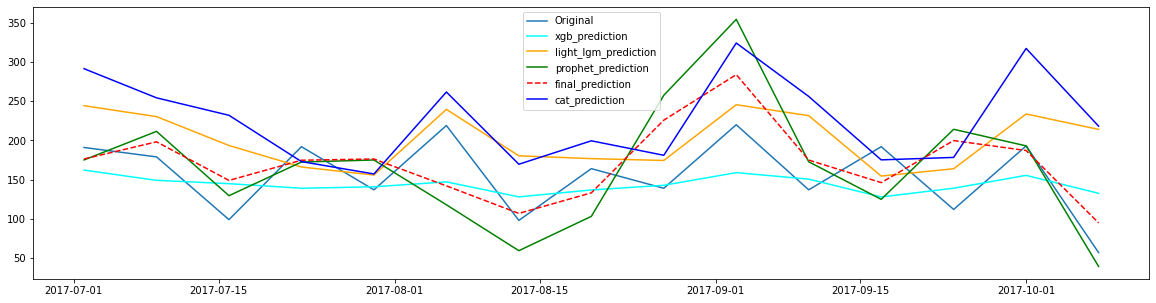

In [333]:
final_preds = pd.DataFrame(final_preds)
final_preds.index = Y_test.index
plt.figure(figsize=(20,5))
# plt.plot(Y_train)
plt.plot(Y_test, label='Original')
plt.plot(xgb_preds, color='cyan', label="xgb_prediction")
plt.plot(lgm_preds, color='orange', label='light_lgm_prediction')
plt.plot(prophet_preds, color='green', label='prophet_prediction')
plt.plot(final_preds, color='red',linestyle='--', label='final_prediction')
plt.plot(cat_preds, color='blue', label='cat_prediction')
plt.legend(loc='best')

In [334]:
final_preds1=pd.DataFrame(final_preds)

In [335]:
final_preds1

0
Date                  
2017-07-02  176.368539
2017-07-09  198.213174
2017-07-16  149.008790
2017-07-23  174.752005
2017-07-30  176.319000
2017-08-06  142.068343
2017-08-13  106.946013
2017-08-20  133.189202
2017-08-27  225.818639
2017-09-03  283.912958
2017-09-10  174.944510
2017-09-17  146.228951
2017-09-24  199.795716
2017-10-01  187.118257
2017-10-08   94.882810

# **Final Result**

In [336]:
import plotly.graph_objs as go
import plotly.offline as pyoff
plot_data = [
    go.Scatter(
        x=Y_train1.index,
        y=Y_train1['num_orders'],
        name='Time Series for num_orders',
        #marker = dict(color = 'Blue')
        #x_axis="OTI",
        #y_axis="time",
    ),
    go.Scatter(
        x=final_preds1.index,
        y=final_preds1[0],
        name='final_prediction',
        marker = dict(color = 'Red')
        #x_axis="OTI",
        #y_axis="time",
    ),
    
]
plot_layout = go.Layout(
        title='Total orders per week',
        yaxis_title='Total orders',
        xaxis_title='Week',
        plot_bgcolor='rgba(0,0,0,0)'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

This is forecast of center id =55, meal id =1993

In [337]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(Y_test, final_preds, squared=False))

49.13268085679305
